# Работа 1.3.1 Определение модуля Юнга на основе исследования деформаций растяжения и изгиба


### Цель работы: 
экспериментально получить зависимость между напряжением и    
деформацией (закон Гука) для двух простейших напря-   
женных состояний упругих тел: одноосного растяжения и чистого   
изгиба; по результатам измерений вычислить модуль Юнга.   

### В работе используются: 
в первой части - прибор Лермантова,   
проволока из исследуемого материала, зрительная труба со шкалой,   
набор грузов, микрометр, рулетка; во второй части - стойка для   
изгибания балки, индикатор для измерения величины прогиба, набор   
исследуемых стержней, грузы, линейка, штангенциркуль.

----


## Теория


### Определение модуля Юнга по измерениям растяжения проволоки (ЭТУ ЧАСТЬ НЕ ДЕЛАЛИ)

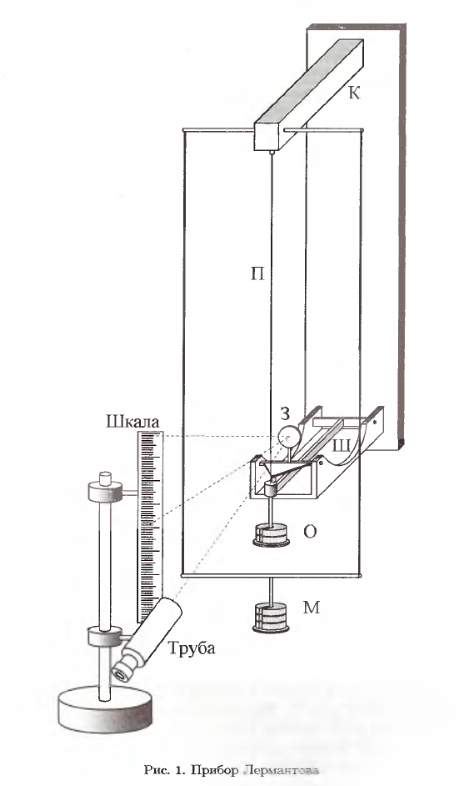   
На рисунке представлен прибор Лермантова


Прибор Лермантова используется для определения модуля Юнга проволоки.

$$\sigma = E\epsilon$$

### Определение модуля Юнга по измерениям изгиба балки

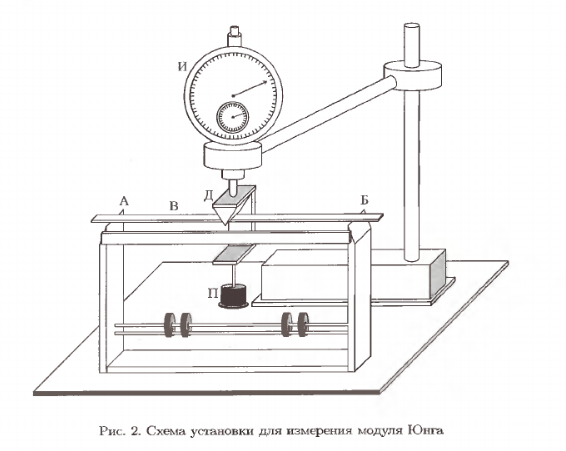

Связь модуля Юнга со стрелой прогиба $y_{max}$:
$$ E = \frac{Pl^{3}}{4ab^{3}y_{max}} $$

$P$ - сила, вызывающая прогиб, $l$ - расстояние AB, $a ~и ~b$ - ширина и высота сечения стержня

## Ход работа

### Изгиб балки 

In [1]:
import numpy as np


In [2]:
ab = 0.504 # м между ребрами призм А и Б

iron_width = [0.0218, 0.0222, 0.0222, 0.0219, 0.0219, 0.0219, 0.0217]
iron_depth = [0.0039, 0.004, 0.0041, 0.0039, 0.0039, 0.0038, 0.0039, 0.004, 0.004, 0.0041]


In [4]:
m_platform = 0.0545 # кг

m     = [0.4723,  0.9685,  0.5035]
y_max = [0.00126, 0.00222, 0.00132]
m = [m_platform + m for m in m]



1.4303

Перевернули металлическую балку


In [ ]:
m     = [0.4723,  0.9685,  0.5035]
y_max = [0.00127, 0.00241, 0.00129]

m = [m_platform + m for m in m]


Деревянная балка 

In [6]:
wood_width = [0.0196, 0.0197, 0.0198, 0.0199, 0.0198, 0.0198, 0.0198, 0.02, 0.0197, 0.0199]
wood_depth = [0.011, 0.011, 0.099, 0.099, 0.01, 0.011, 0.099, 0.01, 0.01, 0.01]
np.mean(wood_width)


0.019799999999999998

ДЛя деревянной балки мерили быстро, не успел записать, данные напарника:
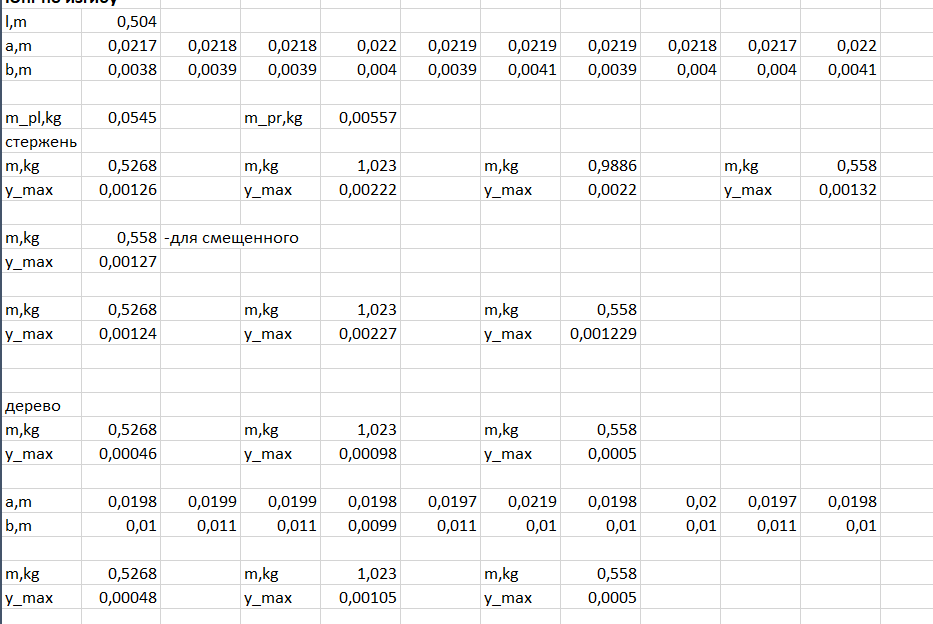